In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Построим эмбеддинги на предобученном resnet50

In [ ]:
from torchvision.models import resnet50, ResNet50_Weights
model = resnet50(pretrained=True)
model

In [ ]:
transforms = ResNet50_Weights.IMAGENET1K_V2.transforms()
transforms

ImageClassification(
    crop_size=[224]
    resize_size=[232]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

In [ ]:
class MyDataset(torch.utils.data.Dataset):
    def __init__(self, X, y=None, transform=None):
        self.const_dir = 'im_data/image_'
        self.transform = transform
        self.num_elem = len(X)
        self.X = X
        self.target = y

    def __getitem__(self, idx):
#         im_name = self.const_dir + str(idx).zfill(4) + '.jpg'
        image = torchvision.io.read_image(self.X.iloc[idx]) / 255

        if (self.transform is not None):
            image = self.transform(image)
        if (self.target is not None):
            return image, self.target.iloc[idx]
        return image
    
    def __len__(self):
        return self.num_elem

In [ ]:
df3

,0,1,2,3,4,5,6,7,8,9,...,253,254,255,avg_views,price,room_num,region,repair_type,im_dir,percentile
10453,0.276703,-0.000041,0.103125,-0.182681,0.012585,0.415501,0.330274,-0.219415,-0.134833,0.444784,...,-0.270398,-0.225300,0.242983,11.468750,2650000,4,2,Без ремонта,first_images/sp_image_0004939.jpg,0.240000
1310,-0.148243,-0.326315,-0.038930,-0.117693,-0.290963,0.105204,0.202030,0.196712,-0.763570,0.068538,...,0.428641,-0.127881,0.153655,30.298625,2700000,1,1,Косметический,first_images/moscow_image_0001314.jpg,0.549020
1311,0.237154,0.028930,0.059327,0.078548,0.115959,0.041975,0.308873,-0.164002,0.187064,0.506183,...,0.092483,-0.404041,0.389993,32.697436,2820000,1,1,Косметический,first_images/moscow_image_0001315.jpg,0.596154
6874,-0.397506,-0.570623,0.413369,-0.221253,0.192293,0.151929,0.235907,0.047687,-1.024232,-0.093843,...,-0.027486,-0.181917,0.170398,38.083333,2900000,1,2,Косметический,first_images/sp_image_0001141.jpg,0.603774
7369,0.037570,-0.114013,-0.137405,-0.189321,-0.114252,0.173033,0.247960,-0.105027,-0.311224,0.230615,...,0.055980,-0.418742,0.212739,31.984674,3000000,2,2,Евроремонт,first_images/sp_image_0001670.jpg,0.574074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5350,-0.726944,-0.033444,-0.784194,0.733269,0.059310,0.126739,-0.549671,1.050739,0.257023,-0.667207,...,1.078165,0.820222,0.034230,7.181818,571584300,4,1,Дизайнерский,first_images/moscow_image_0005369.jpg,0.833333
4560,0.218035,0.161302,-0.915877,0.539048,0.002434,-0.267359,-0.283105,0.766008,0.360506,-0.388122,...,0.896165,0.704620,-0.302722,28.683305,600000000,4,1,Дизайнерский,first_images/moscow_image_0004572.jpg,0.830189
4742,0.251614,-0.270339,0.110404,-0.370556,0.535555,0.087626,0.529094,-0.560699,-0.072350,0.362311,...,-0.051231,0.068895,0.457285,14.929032,693623800,4,1,Без ремонта,first_images/moscow_image_0004754.jpg,0.826923
4881,-0.113899,0.051477,-0.616891,0.379220,-0.351413,-0.108092,-0.602935,0.024796,0.436103,-0.030878,...,0.639202,0.647596,-0.342575,17.727273,1142439200,4,1,Дизайнерский,first_images/moscow_image_0004894.jpg,0.823529


In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model.eval()

In [ ]:
df4 = df3[['im_dir', 'avg_views', 'price', 'room_num', 'region', 'repair_type', 'percentile']]
df4['Repair_types_id'] = 0

<ipython-input-56-8e2d1e96dbfa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Repair_types_id'] = 0


In [ ]:
drop_list = []
for i in range(len(df4)):
    try:
        img = torchvision.io.read_image(df4.iloc[i]['im_dir']) / 255
        if img.shape[1] < 224 or img.shape[2] < 224:
            drop_list += [i]
            print(img.shape)
    except:
        drop_list += [i]

In [ ]:
len(drop_list)

0

In [ ]:
from torch.utils.data import DataLoader
dataset = MyDataset(df4['im_dir'], df4['Repair_types_id'], transform=transforms)

batch_size=1
dataset_loader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

In [ ]:
df4['img_embed'] = None

<ipython-input-70-cd23d6aae675>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['img_embed'] = None


In [ ]:
model.to(device)

In [ ]:
from tqdm.notebook import tqdm
predictions = np.array([])
true_labels = np.array([])
i = 0
for x_batch, y_batch in tqdm(dataset_loader):
    data = x_batch.to(device)
    # target = y_batch.cpu().numpy()
    output = model(data)
    df4['img_embed'].iloc[i] = output.cpu().detach().numpy()
    i += 1
    # preds = np.argmax(nn.functional.softmax(output).cpu().detach().numpy(), 1)
    # predictions = np.append(predictions, preds)
    # true_labels = np.append(true_labels, target)

  0%|          | 0/11227 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
<ipython-input-75-64b18778e22c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['img_embed'].

In [ ]:
df4 = df4.reset_index()

In [ ]:
df5 = pd.DataFrame()
for i in range(len(df4)):
    df5 = pd.concat([df5, pd.DataFrame(df4['img_embed'].iloc[i].tolist())])

In [ ]:
df5 = df5.reset_index()

In [ ]:
df5['avg_views'] = df4['avg_views']
df5['price'] = df4['price']
df5['room_num'] = df4['room_num']
df5['region'] = df4['region']
df5['repair_type'] = df4['repair_type']
df5['im_dir'] = df4['im_dir']
df5['percentile'] = df4['percentile']

In [ ]:
df5 = df5.drop(columns = ['index'])

In [ ]:
df5.to_csv('resnet50_embeds.csv')

# Обучим регрессионные модели на перцентиль

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import torchvision
import torch
import torch.nn as nn

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# df3 = pd.read_csv('/content/drive/MyDrive/Diplom/Domclick_embeds_after_rep_type_classification')
df3 = pd.read_csv('/content/drive/MyDrive/Diplom/resnet50_embeds.csv')


In [ ]:
df3 = df3.drop(columns = ['Unnamed: 0'])

In [ ]:
# Создадим функцию, которая будет считать квантиль по среднему количеству просмотров и цене
def get_quantile(x):
    val = x.iloc[x.shape[0] - 51]
    return (x < val).sum() / (x.shape[0] - 1)

df3 = df3.sort_values(by='price')
df3['percentile'] = df3['avg_views'].rolling(window=101, center=True, min_periods=0).apply(get_quantile)
df3

,0,1,2,3,4,5,6,7,8,9,...,997,998,999,avg_views,price,room_num,region,repair_type,im_dir,percentile
0,-2.251719,-2.422514,-0.598347,-1.012794,-0.360683,-0.150114,0.585989,-0.175904,1.132329,1.963972,...,-0.774251,1.722689,-1.418442,11.468750,2650000,4,2,Без ремонта,first_images/sp_image_0004939.jpg,0.240000
1,-2.047439,-1.495545,-2.760149,-3.241964,-2.015230,-1.781675,-2.837402,-0.770609,-1.698998,-1.859917,...,-1.585523,-1.778759,2.605822,30.298625,2700000,1,1,Косметический,first_images/moscow_image_0001314.jpg,0.549020
2,-2.670312,-2.108578,-0.314647,-3.162486,-1.048982,-2.832494,-2.732476,1.597565,-0.250546,-0.703780,...,-0.851761,-0.292446,-0.667270,32.697436,2820000,1,1,Косметический,first_images/moscow_image_0001315.jpg,0.596154
3,-6.049531,-2.412641,-1.236969,-1.271190,-1.643044,-0.036991,-4.492974,-4.817682,-4.377002,-3.924016,...,-5.139545,0.454028,2.503264,38.083333,2900000,1,2,Косметический,first_images/sp_image_0001141.jpg,0.603774
4,-1.145826,-0.805099,-1.109192,-2.434515,-1.408299,1.591794,1.233977,-0.214894,-0.009800,-0.747117,...,0.520312,2.115345,-0.722572,31.984674,3000000,2,2,Евроремонт,first_images/sp_image_0001670.jpg,0.574074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11222,-4.642694,-1.117087,-0.051482,-1.320840,-0.511292,-0.778644,-1.829321,-0.044967,0.163060,-0.960988,...,1.428785,0.472567,3.093750,7.181818,571584300,4,1,Дизайнерский,first_images/moscow_image_0005369.jpg,0.833333
11223,-4.446047,0.060631,-2.984605,-3.503481,-2.286050,-0.456000,-2.439171,-2.394057,-2.367608,-1.754611,...,-1.358884,-1.087535,0.086674,28.683305,600000000,4,1,Дизайнерский,first_images/moscow_image_0004572.jpg,0.830189
11224,-3.791926,-2.531874,-0.670584,-0.954797,0.927319,-1.570152,-2.871351,-0.638088,-2.020418,1.322283,...,-1.580785,0.018768,-1.056159,14.929032,693623800,4,1,Без ремонта,first_images/moscow_image_0004754.jpg,0.826923
11225,-5.709174,-0.654345,-1.530472,-0.993471,-0.195198,0.738493,-2.188965,-2.027622,-3.044896,-2.379397,...,-2.769575,-1.887958,6.358446,17.727273,1142439200,4,1,Дизайнерский,first_images/moscow_image_0004894.jpg,0.823529


In [ ]:
!pip install catboost
from catboost import CatBoostClassifier, Pool

In [ ]:
X = df3.drop(columns=['avg_views', 'price', 'room_num', 'region', 'repair_type', 'im_dir', 'percentile'])
y = df3['percentile']
X

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,-2.251719,-2.422514,-0.598347,-1.012794,-0.360683,-0.150114,0.585989,-0.175904,1.132329,1.963972,...,1.150034,-0.539234,-0.846044,-1.670993,-1.931855,-0.027059,1.003856,-0.774251,1.722689,-1.418442
1,-2.047439,-1.495545,-2.760149,-3.241964,-2.015230,-1.781675,-2.837402,-0.770609,-1.698998,-1.859917,...,-3.087425,-2.523587,-2.796978,-3.724830,-5.171324,-2.213407,-0.041666,-1.585523,-1.778759,2.605822
2,-2.670312,-2.108578,-0.314647,-3.162486,-1.048982,-2.832494,-2.732476,1.597565,-0.250546,-0.703780,...,0.728406,-2.948916,0.543309,-3.001659,-3.255965,-0.947264,-1.852442,-0.851761,-0.292446,-0.667270
3,-6.049531,-2.412641,-1.236969,-1.271190,-1.643044,-0.036991,-4.492974,-4.817682,-4.377002,-3.924016,...,-2.877860,-3.696833,-4.266395,-5.586071,-5.217340,-3.344693,-2.107520,-5.139545,0.454028,2.503264
4,-1.145826,-0.805099,-1.109192,-2.434515,-1.408299,1.591794,1.233977,-0.214894,-0.009800,-0.747117,...,1.537268,-0.127872,-0.506310,-1.120651,-1.953786,-0.003021,0.235665,0.520312,2.115345,-0.722572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11222,-4.642694,-1.117087,-0.051482,-1.320840,-0.511292,-0.778644,-1.829321,-0.044967,0.163060,-0.960988,...,0.205301,-0.212541,0.963139,-1.244626,-1.021693,1.098959,3.051946,1.428785,0.472567,3.093750
11223,-4.446047,0.060631,-2.984605,-3.503481,-2.286050,-0.456000,-2.439171,-2.394057,-2.367608,-1.754611,...,-1.001403,-3.706141,-3.022169,-4.365458,-5.530421,-1.403533,-1.454539,-1.358884,-1.087535,0.086674
11224,-3.791926,-2.531874,-0.670584,-0.954797,0.927319,-1.570152,-2.871351,-0.638088,-2.020418,1.322283,...,-0.844315,-2.044824,-2.238617,-4.256095,-3.624285,-0.108886,-0.577640,-1.580785,0.018768,-1.056159
11225,-5.709174,-0.654345,-1.530472,-0.993471,-0.195198,0.738493,-2.188965,-2.027622,-3.044896,-2.379397,...,-1.941376,-4.000991,-2.655928,-5.035506,-5.947753,-3.196737,-0.520618,-2.769575,-1.887958,6.358446


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
train = Pool(
    data=X_train,
    label=y_train,
)

test = Pool(
    data=X_test,
    label=y_test,
)

In [ ]:
# Здесь были эксперименты с Catboost
default_parameters = {
    'iterations': 2000,
    'verbose': True,
    'random_seed': 0,
    "eval_metric" : 'Accuracy',
    'learning_rate': 0.005,
    # 'depth': 7,
    # 'l2_leaf_reg': 20,
    'loss_function': 'CrossEntropy'
}
model = CatBoostClassifier(**default_parameters)
model.fit(train, eval_set=test)

In [ ]:
# Здесь эксперименты с линейной регрессией
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
# clf.predict(X[:2, :])
# clf.predict_proba(X[:2, :])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df3, prob_table[['prob']], test_size=0.33, random_state=42)

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
y_pred = reg.predict(X_test)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))

Test RMSE = 0.2989


In [ ]:
baseline = np.array(len(y_pred) * [0.5])

In [ ]:
print("Baseline RMSE = %.4f" % mean_squared_error(y_test, baseline, squared=False))

Baseline RMSE = 0.2921


In [ ]:
!unzip /content/drive/MyDrive/Diplom/first_images.zip

In [ ]:
from sklearn import linear_model
reg = linear_model.Ridge(alpha=.2)
reg.fit(X_train, y_train)

Ridge(alpha=0.2)

In [ ]:
y_pred = reg.predict(X_test)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))

Test RMSE = 0.2837


# Запустим модель Ranknet с pairwise loss

In [ ]:
class DenseNet(nn.Module):
    def __init__(self, input_dim):
        super(DenseNet, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(256, 256),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(256, 64),
            nn.ReLU(),
            nn.Dropout(0.8),
            nn.Linear(64, 1),
        )
    def forward(self, x):
        return self.net(x)

In [ ]:
from tqdm.notebook import tqdm
# from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from IPython.display import clear_output

def train_epoch(model, optimizer):
    loss_log, roc_auc_log = [], []
    model.train()
    # progress_bar = tqdm(train_loader, desc=f'Training {epoch}/{num_epochs}')
    i = 0
    for x1_batch, x2_batch in tqdm(train_loader):
        # if i > 20000:
        #     break
        # print(i)
        data1 = x1_batch.to(device)
        data2 = x2_batch.to(device)
        optimizer.zero_grad()
        rel_score = model(data1)
        irr_score = model(data2)
        preds = nn.functional.sigmoid(rel_score - irr_score)
        preds = preds.squeeze(1)
        roc_auc = 0


        loss = nn.BCELoss()(preds, torch.ones(preds.shape[0]).to(device))
        loss.backward()
        optimizer.step()
        loss = loss.item()
        loss_log.append(loss)
        i += 1
    return loss_log, roc_auc_log

def test(model):
    loss_log, roc_auc_log = [], []
    model.eval()
    i = 0
    for x1_batch, x2_batch in tqdm(test_loader):
        # if i > 5000:
        #     break
#         print(i)
        data1 = x1_batch.to(device)
        data2 = x2_batch.to(device)

        rel_score = model(data1)
        irr_score = model(data2)
        preds = nn.functional.sigmoid(rel_score - irr_score)
        preds = preds.squeeze(1)
        loss = nn.BCELoss()(preds, torch.ones(preds.shape[0]).to(device))
        
        loss = loss.item()
        loss_log.append(loss)
        i += 1
    return loss_log, roc_auc_log

def plot_history(train_history, val_history, title='loss'):
    plt.figure()
    plt.title('{}'.format(title))
    plt.plot(train_history, label='train', zorder=1)
    
    points = np.array(val_history)
    
    plt.scatter(points[:, 0], points[:, 1], marker='+', s=180, c='orange', label='val', zorder=2)
    plt.xlabel('train steps')
    
    plt.legend(loc='best')
    plt.grid()

    plt.show()
    
def train(model, opt, n_epochs):
    hist = []
    model.to(device)
    train_log, train_roc_auc_log = [], []
    val_log, val_roc_auc_log = [], []

    batchsize = 32

    for epoch in range(n_epochs):
        print("Epoch {} of {}".format(epoch, n_epochs))
        train_loss, train_roc_auc = train_epoch(model, opt)

        val_loss, val_roc_auc = test(model)

        train_log.extend(train_loss)
        train_roc_auc_log.extend(train_roc_auc)

        steps = len(X1_train_data) / batchsize
        # steps = 20000
        val_log.append((steps * (epoch + 1), np.mean(val_loss)))
        val_roc_auc_log.append((steps * (epoch + 1), np.mean(val_roc_auc)))

        clear_output()
        plot_history(train_log, val_log)    
        plot_history(train_roc_auc_log, val_roc_auc_log, title='roc_auc')
        print("Epoch {} roc_auc = {:.2%}".format(epoch, val_roc_auc_log[-1][1]))
        hist += [(epoch, val_roc_auc_log[-1][1])]
#         torch.save(model, './model_regnet_AdamW1' + str(epoch) + '.pth')
    
    for epoch, auc in hist:
        print(epoch, ': ', auc)
            
    print("Final roc_auc: {:.2%}".format(val_roc_auc_log[-1][1]))

In [ ]:
df3['embeds'] = df3.iloc[:, range(0, 1000)].values.tolist()

In [ ]:
df3

In [ ]:
torch_embeds_list = []
for i in range(len(df3)):
    torch_embeds_list += [torch.FloatTensor(df3['embeds'].iloc[i])]

In [ ]:
df3['torch_embeds'] = torch_embeds_list

In [ ]:
X1_data = pd.DataFrame()
X2_data = pd.DataFrame()

for i in range(len(df3) // 100):
    window = df3.iloc[i * 100:(i + 1) * 100, ].sort_values(by='percentile',  ascending=False)
    best_data = window.iloc[0:50, ]
    worse_data = window.iloc[50:100, ]
    X1_data = pd.concat([X1_data, best_data])
    X2_data = pd.concat([X2_data, worse_data])

# X1_data = df3.sort_values(by='percentile',  ascending=False).iloc[0:len(df3)//2, ]
# X2_data = df3.sort_values(by='percentile',  ascending=False).iloc[len(df3)//2+1:, ]

In [ ]:
X1_data = X1_data.reset_index()
X2_data = X2_data.reset_index()

In [ ]:
print(len(X1_data),len(X2_data))

4950 4950


In [ ]:
SPLIT = int(len(X1_data) * 0.75)
X1_train_data = X1_data.iloc[0:SPLIT,]
X1_test_data = X1_data.iloc[SPLIT:len(X1_data),]

X2_train_data = X2_data.iloc[0:SPLIT,]
X2_test_data = X2_data.iloc[SPLIT:len(X2_data),]

In [ ]:
print(len(X1_train_data),len(X2_train_data))

4200 4200


In [ ]:
pair_list_train = []
for i in range(len(X1_train_data)):
    for j in range(len(X1_train_data)):
        pair_list_train += [(i, j)]

pair_list_test = []
for i in range(len(X1_test_data)):
    for j in range(len(X1_test_data)):
        pair_list_test += [(i, j)]

In [ ]:
from random import shuffle
shuffle(pair_list_train)
shuffle(pair_list_test)

In [ ]:
pair_list_train[0]

(1281, 137)

In [ ]:
a, b = pair_list_train[124453]
print(a,b)

2945 3138


In [ ]:
class MyDataset(torch.utils.data.Dataset):
    def __init__(self, x1, x2, transform=None):
        self.transform = transform
        self.num_elem = len(x1)
        self.x1 = x1
        self.x2 = x2

    def __getitem__(self, idx):
#         im_name = self.const_dir + str(idx).zfill(4) + '.jpg'
        embed1 = self.x1['torch_embeds'].iloc[idx]
        embed2 = self.x2['torch_embeds'].iloc[idx]
        return embed1, embed2
    
    def __len__(self):
        return self.num_elem

In [ ]:
from torch.utils.data import DataLoader
train_dataset = MyDataset(X1_train_data, X2_train_data)
test_dataset = MyDataset(X1_test_data, X2_test_data)

batch_size=32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
print(len(train_dataset), len(test_dataset))

4200 1400


In [ ]:
train_dataset[0][0]

In [ ]:
model = DenseNet(1000)
model

DenseNet(
  (net): Sequential(
    (0): Linear(in_features=1000, out_features=256, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.1, inplace=False)
    (3): Linear(in_features=256, out_features=256, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.2, inplace=False)
    (6): Linear(in_features=256, out_features=64, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.8, inplace=False)
    (9): Linear(in_features=64, out_features=1, bias=True)
  )
)

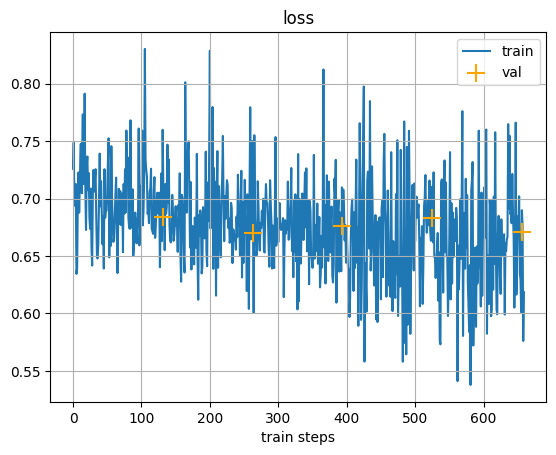

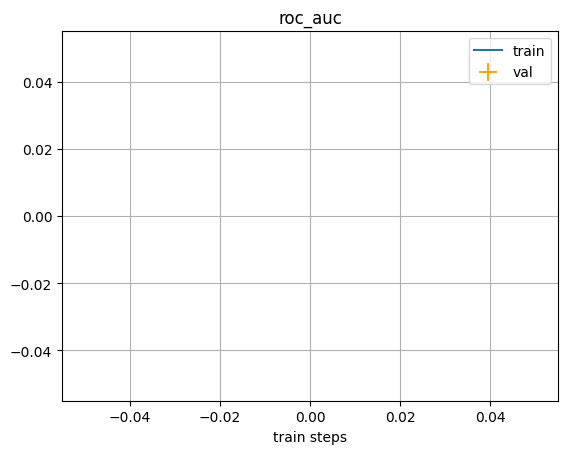

Epoch 4 roc_auc = nan%
0 :  nan
1 :  nan
2 :  nan
3 :  nan
4 :  nan
Final roc_auc: nan%


In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
opt = torch.optim.AdamW(model.parameters(), lr=0.0005)
# criterion = nn.CrossEntropyLoss()
train(model, opt, 5)

In [ ]:
from tqdm.notebook import tqdm
predictions1 = np.array([])
predictions2 = np.array([])
true_labels = np.array([])
for x1_batch, x2_batch in tqdm(test_loader):
    data1 = x1_batch.to(device)
    data2 = x2_batch.to(device)
    # target = y_batch.cpu().numpy()
    
    rel_score = model(data1)
    irr_score = model(data2)
    # preds = nn.functional.sigmoid(rel_score - irr_score)
    preds1 = rel_score.cpu().detach().numpy()
    preds2 = irr_score.cpu().detach().numpy()
    # preds = np.argmax(nn.functional.softmax(output).cpu().detach().numpy(), 1)
    predictions1 = np.append(predictions1, preds1)
    predictions2 = np.append(predictions2, preds2)
    # true_labels = np.append(true_labels, target)

  0%|          | 0/44 [00:00<?, ?it/s]

In [ ]:
len(predictions)

1404

In [ ]:
# pred_table = pd.DataFrame()
X1_test_data['preds'] = predictions1
X2_test_data['preds'] = predictions2
X1_test_data['is_good'] = 1
X2_test_data['is_good'] = 0

In [ ]:
all_data = pd.concat([X1_test_data, X2_test_data])

In [ ]:
all_data[['price', 'is_good', 'percentile', 'preds', 'im_dir']].to_csv('data_with_score.csv', index=False)

In [ ]:
from itertools import product

def simple_roc_auc(positive, negative):
    common_counter = 0
    positive_counter = 0

    for p, n in product(positive, negative):
        common_counter += 1
        if p > n:
            positive_counter += 1
            
    return positive_counter / common_counter


positive = np.array(predictions1) # предсказания для "хороших"
negative = np.array(predictions2) # предсказания для плохих

print(simple_roc_auc(positive, negative))

0.5902688775510204


In [ ]:
tmp = X1_test_data[X1_test_data['preds1'] > 0].reset_index()
# tmp = X2_test_data[X1_test_data['preds2'] < -1].reset_index()
# tmp1 = X1_test_data[X1_test_data['preds1'] > X1_test_data['preds2']].reset_index()
# tmp2 = X2_test_data[X1_test_data['preds1'] < X1_test_data['preds2']].reset_index()

In [ ]:
print(tmp['price'].mean(), X1_test_data['price'].mean())

87705407.26769231 95492347.90571429


In [ ]:
tmp.shape


(325, 1013)

In [ ]:
!unzip /content/drive/MyDrive/Diplom/first_images.zip

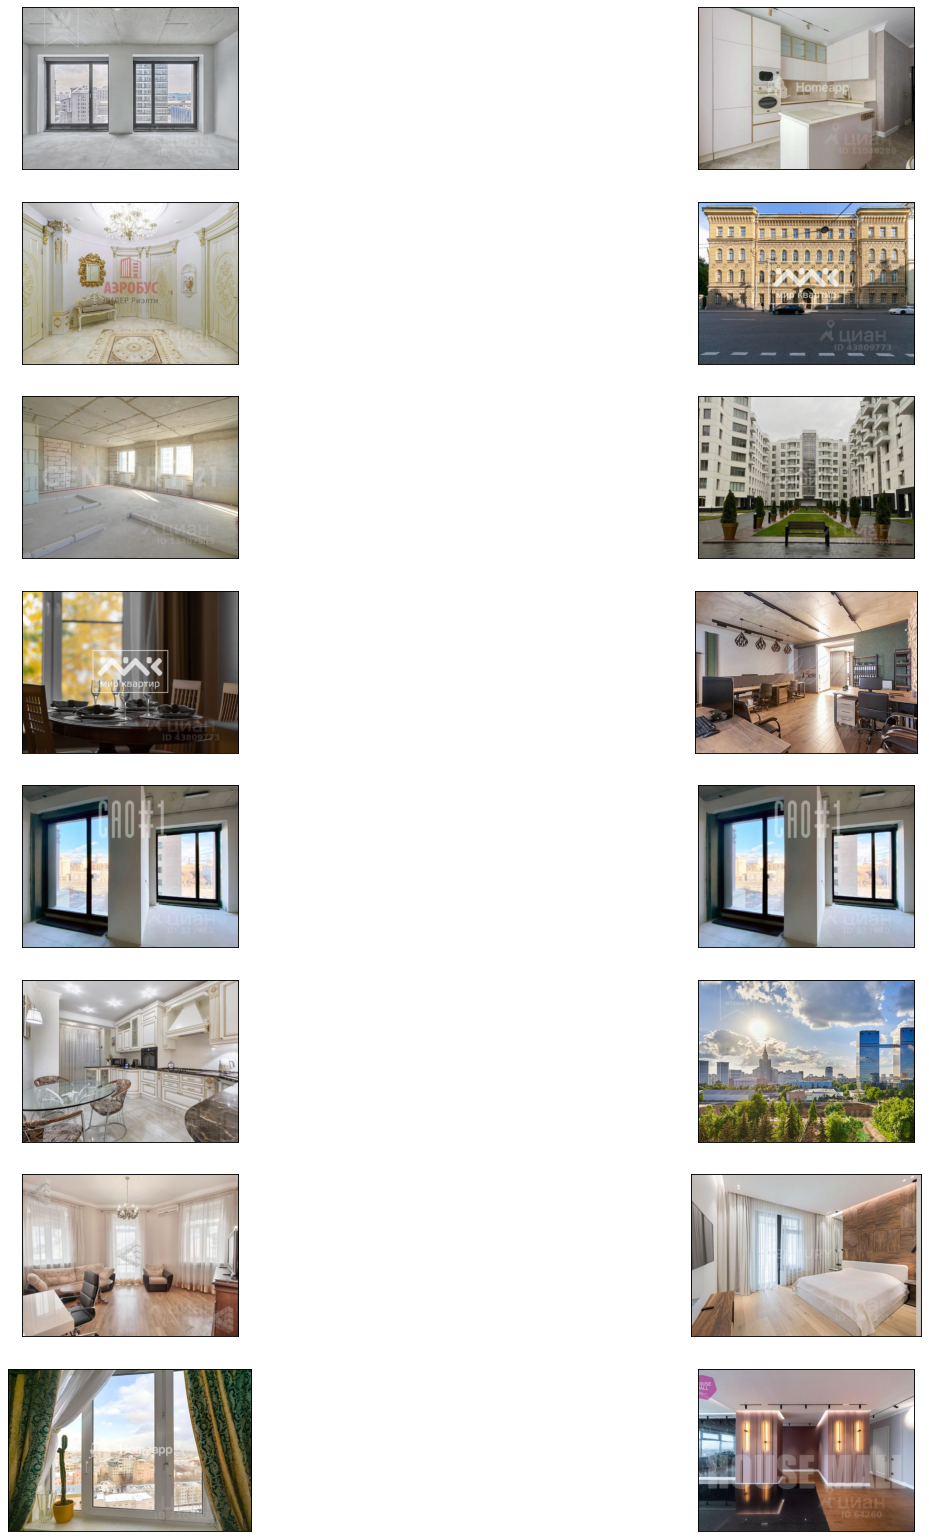

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(20, 50), dpi=80)
# a = len(tmp) // 5
# fig, axes = plt.subplots(3, 6, figsize=(20, 5))
for i in range(32, 48):
    img1 = torchvision.io.read_image(tmp1['im_dir'].iloc[i-1]) / 255
    img2 = torchvision.io.read_image(tmp2['im_dir'].iloc[i-1]) / 255
    plt.subplot(16, 2, i%16 + 1)
    plt.imshow(img1.permute(1, 2, 0), cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.subplot(16, 2, (i+1)%16 + 1)
    plt.imshow(img2.permute(1, 2, 0), cmap='gray')
    plt.xticks([])
    plt.yticks([])
    # plt.imshow(img.permute(1, 2, 0), cmap='gray')
    # tmp['im_dir']